In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
np.set_printoptions(precision=2) # exibição para 2 casas decimais para arrays
data = pd.read_csv('50_Startups.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
print(X[:5])
print()
print(y[:5])

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']]

[192261.83 191792.06 191050.39 182901.99 166187.94]


In [3]:
# Transform countries on binary 3 column, because has 3 types of countries in the table
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
                                   # tipo                       #coluna    #ignorar as outras colunas
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X)) # Transformar em um matriz
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [4]:
# Em regressão linear múltipla não precisa aplicar escala de características Normalization Standardization
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

In [5]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression().fit(X_train, y_train)

In [6]:
y_pred = regressor.predict(X_test)
result = np.column_stack((y_pred, y_test)) # Combine two arrays horizontal and transnform into a array with 2 columns apart
print(result[::])

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


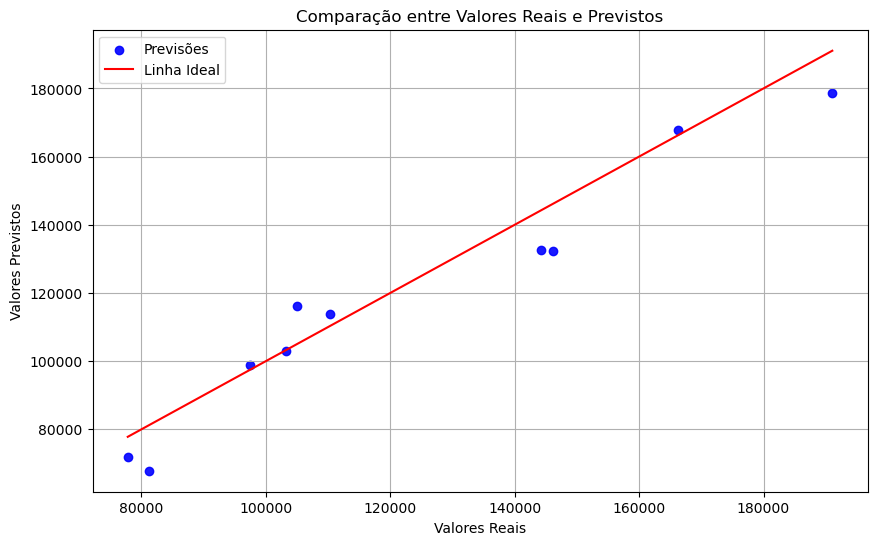

In [7]:
plt.figure(figsize=(10, 6))                                #Transparência
plt.scatter(y_test, y_pred, color='blue', label='Previsões', alpha=0.9)
                # Eixo X                    #Eixo Y
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Linha Ideal')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Comparação entre Valores Reais e Previstos')
plt.legend() # Legenda em cima
plt.grid() # Linhas do gráfico
plt.show() # mostrar gráfico

In [8]:
from sklearn.metrics import mean_absolute_error, r2_score
# Calcular R² aproximidade com os valores
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")

# Calcular MAE margem de diferença média dos salários
mae = mean_absolute_error(y_test, y_pred)
print(f"Erro Médio Absoluto (MAE): {mae}")

R²: 0.9347068473282567
Erro Médio Absoluto (MAE): 7514.293659643097


In [9]:
#Prevendo apenas 1 situação
print(regressor.predict([[1, 0, 0, 160000,  130000, 300000 ]]))

[181566.92]


In [10]:
print(regressor.coef_)
print(regressor.intercept_)

[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
42467.52924852117
